### Stock Market Prediction And Forecasting Using Stacked LSTM

In [94]:
import pandas_datareader as pdr
import yfinance

In [95]:
import pandas as pd
import pandas_datareader as data

In [96]:
start = '2017-04-15'
end = '2022-04-15'
df=data.DataReader('AAPL','yahoo',start,end)

In [97]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-17,35.470001,35.217499,35.369999,35.457500,66328400.0,33.428432
2017-04-18,35.509998,35.277500,35.352501,35.299999,58790000.0,33.279945
2017-04-19,35.500000,35.112499,35.470001,35.169998,69313600.0,33.157383
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.572205
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.532150


In [98]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-08,171.779999,169.199997,171.779999,170.089996,76575500.0,169.840454
2022-04-11,169.029999,165.500000,168.710007,165.750000,72246700.0,165.506821
2022-04-12,169.869995,166.639999,168.020004,167.660004,79265200.0,167.414032
2022-04-13,171.039993,166.770004,167.389999,170.399994,70618900.0,170.149994
2022-04-14,171.270004,165.039993,170.619995,165.289993,75329400.0,165.047501


In [99]:
df1=df.reset_index()['Close']
df1.head()

0    35.457500
1    35.299999
2    35.169998
3    35.610001
4    35.567501
Name: Close, dtype: float64

In [100]:
df1.shape


(1260,)

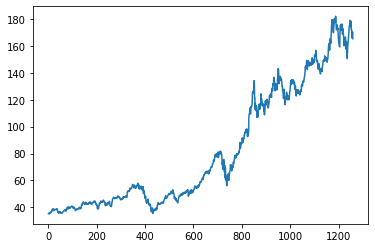

In [101]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [102]:
import numpy as np

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [104]:
print(df1)

[[1.95792901e-03]
 [8.85324648e-04]
 [0.00000000e+00]
 ...
 [9.02274644e-01]
 [9.20934344e-01]
 [8.86134557e-01]]


In [105]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [106]:
training_size,test_size

(819, 441)

In [107]:
# train_data

In [108]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [109]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [110]:
print(ytest.shape)

(340,)


In [111]:
print(X_train.shape), print(y_train.shape)

(718, 100)
(718,)


(None, None)

In [112]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [113]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train)

[[[0.00195793]
  [0.00088532]
  [0.        ]
  ...
  [0.03978822]
  [0.03643423]
  [0.0361448 ]]

 [[0.00088532]
  [0.        ]
  [0.00299648]
  ...
  [0.03643423]
  [0.0361448 ]
  [0.03503814]]

 [[0.        ]
  [0.00299648]
  [0.00270705]
  ...
  [0.0361448 ]
  [0.03503814]
  [0.0305605 ]]

 ...

 [[0.31146147]
  [0.30580904]
  [0.29346568]
  ...
  [0.40978277]
  [0.41257495]
  [0.41371562]]

 [[0.30580904]
  [0.29346568]
  [0.26814901]
  ...
  [0.41257495]
  [0.41371562]
  [0.41070215]]

 [[0.29346568]
  [0.26814901]
  [0.25095341]
  ...
  [0.41371562]
  [0.41070215]
  [0.42146218]]]


In [114]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [115]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [116]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=5,batch_size=64,verbose=1)

Epoch 1/5
12/12 [==============================] - 8s 234ms/step - loss: 0.0068 - val_loss: 0.1088
Epoch 2/5
12/12 [==============================] - 2s 157ms/step - loss: 0.0016 - val_loss: 0.0047
Epoch 3/5
12/12 [==============================] - 2s 161ms/step - loss: 6.5463e-04 - val_loss: 0.0087
Epoch 4/5
12/12 [==============================] - 2s 149ms/step - loss: 5.0150e-04 - val_loss: 0.0041
Epoch 5/5
12/12 [==============================] - 2s 163ms/step - loss: 4.7288e-04 - val_loss: 0.0127


In [119]:
import tensorflow as tf

In [120]:
tf.__version__

'2.8.0'

In [121]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [122]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [123]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

56.17113670636289

In [124]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

161.51064339510077

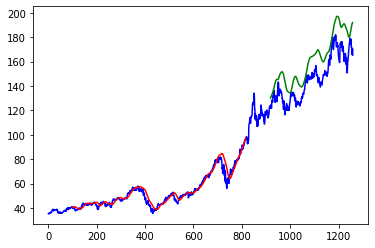

In [125]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),'b',label='original')
plt.plot(trainPredictPlot,'r',label='training data')
plt.plot(testPredictPlot,'g',label='testing data')
plt.show()

In [126]:
len(test_data)

441

In [127]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [128]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [129]:
temp_input


[0.857055361224095,
 0.8597113091904174,
 0.8633206717109483,
 0.8283846528417573,
 0.8517434652914497,
 0.8862027249263402,
 0.8825933624058093,
 0.8757150609156561,
 0.8626396167803456,
 0.8863389566953395,
 0.9262462401174814,
 0.9528058236951003,
 0.9492645251018725,
 0.9825660744862523,
 0.9573005368425362,
 0.9476982234587572,
 0.9815445960047409,
 0.9336011969275424,
 0.925973880493876,
 0.9165077988790962,
 0.9385726693092789,
 0.9566194819119334,
 0.9609779632903703,
 0.9885590253495005,
 0.981476428163045,
 0.9820894191663447,
 0.974053407425681,
 0.9697630938889401,
 1.0,
 0.9842686078983667,
 0.9517161773718927,
 0.9318305995881249,
 0.9329883098386356,
 0.9331245416076346,
 0.9528058236951003,
 0.9558703630540273,
 0.9331245416076346,
 0.9391174924708827,
 0.9168483263443976,
 0.8925360993404969,
 0.8808226611519991,
 0.8665214428388748,
 0.8611413790645335,
 0.8486107580908266,
 0.8479978710019196,
 0.8447970998739933,
 0.9204576888649285,
 0.9507627628176845,
 0.94960505

In [130]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,100, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 100,1))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[1.0694270133972168], [1.0705734491348267], [1.0730880498886108], [1.077303409576416], [1.0832692384719849], [1.0908563137054443], [1.0998404026031494], [1.109961986541748], [1.1209620237350464], [1.1326065063476562], [1.1446959972381592], [1.1570672988891602], [1.1695950031280518], [1.1821813583374023], [1.1947568655014038], [1.2072705030441284], [1.2196862697601318], [1.2319791316986084], [1.2441314458847046], [1.256130337715149], [1.267966389656067], [1.279631495475769], [1.2911193370819092], [1.3024227619171143], [1.3135374784469604], [1.3244565725326538], [1.3351749181747437], [1.3456883430480957], [1.3559905290603638], [1.3660780191421509]]


In [131]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [132]:
import matplotlib.pyplot as plt

In [133]:
len(df1)

1260

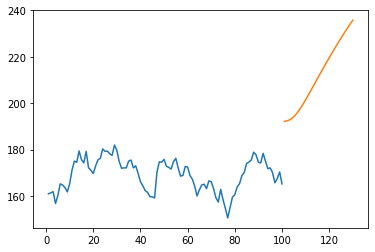

In [134]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

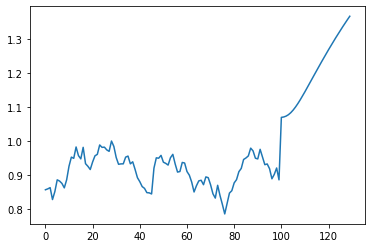

In [135]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[len(df1)-100:])

In [136]:
df3=scaler.inverse_transform(df3).tolist()

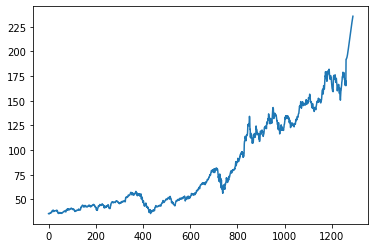

In [137]:
plt.plot(df3)